# Goals
Optimasi Campaign Results terkait penawaran produk baru, sehingga mendapatkan profit yang maksimal di bulan depan dan memahami karakteristik customers yang menerima penawaran produk baru tersebut.

# Data Quality Check
- Q1: Apakah ada features yang data type-nya tidak sesuai?
- Q2: Adakah duplicate,  missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?
- Q3: Apakah terdapat distribusi yang tidak masuk akal?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.shape

(2240, 28)

## Question 1
Apakah ada features yang data type-nya tidak sesuai?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# Temuan: Income memiliki white space di awal dan salah tipe data, Dt_Customer juga salah tipe data

In [6]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
        
    print()

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

In [7]:
df.columns = df.columns.str.replace(' ', '') #clean whitespace dari nama kolom

In [8]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [9]:
# Menghilangkan simbol dollar dan koma pada kolom 'Income' agar dapat diolah sebagai int64 atau float64 dan bukan object
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')

In [10]:
df.Income

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

In [11]:
# Ubah jadi float64
df['Income'] = df['Income'].astype('float')

In [12]:
# Ubah juga dari object ke datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [14]:
# Kesimpulan: Income, Dt_Customer telah disesuaikan nama dan tipe datanya

## Question 2
Adakah duplicate,  missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?

### Duplicates

In [15]:
#Cek duplikasi data
df.duplicated()
#df.duplicated().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

### Missing Values

In [16]:
# Cek missing values yang ada, misal apakah mungkin customer tidak memiliki income
# Bisa di fill dengan mean/median tergantung dengan distribusi data incomenya
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

<Axes: xlabel='Income'>

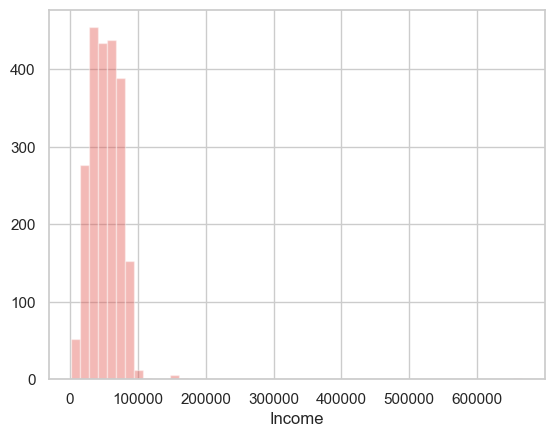

In [17]:
sns.distplot(df['Income'], kde=False, hist=True)

In [18]:
# Ada outlier data di range antara 100.000 - 200.000

<Axes: >

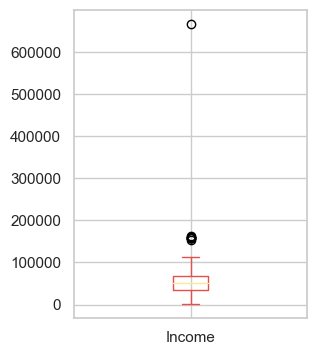

In [19]:
# Cek outlier dengan boxplot dan terlihat ada outlier di Income pada range 100.000 - 200.000
df['Income'].plot(kind='box', figsize=(3,4))

In [20]:
df['Income'] = df['Income'].fillna(df['Income'].median())
# Kenapa median, karena median lebih robust terhadap outlier/missing values dibandingkan mean. 
# Nilai mean dapat terdistorsi oleh outlier/missing values yang ada di Income dan tidak mencerminkan nilai yang sebenarnya.

In [21]:
# cek apakah masih ada missing values
df.isna().sum().sort_values(ascending=False)

ID                     0
Year_Birth             0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Country                0
dtype: int64

### Outliers

In [22]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [23]:
df.select_dtypes(include=['float','int'])

# ascending Year_Birth
df.sort_values(by='Year_Birth', ascending=True).drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'])

# ascending Income
# df.sort_values(by='Income', ascending=True).drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'])



,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country
513,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,SA
827,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,SP
2233,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,IND
2171,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,SP
1740,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,17,372,138,106,44,1,3,8,12,1,GER
964,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,51,631,72,55,32,1,4,6,8,2,IND
1468,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,2,11,2,0,4,1,1,0,2,6,SP
1824,1996,Basic,Married,14421.0,0,0,2014-02-17,81,0,0,2,3,3,8,1,1,0,2,5,SP


In [24]:
# Terdapat data yang kurang meyakinkan pada Year_Birth, karena kecil kemungkinan pelanggan yang berusia di atas 100 tahun
#2025 - 1893 (DoB paling tua) = 132 tahun

In [25]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                               'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'],
               inplace=True)

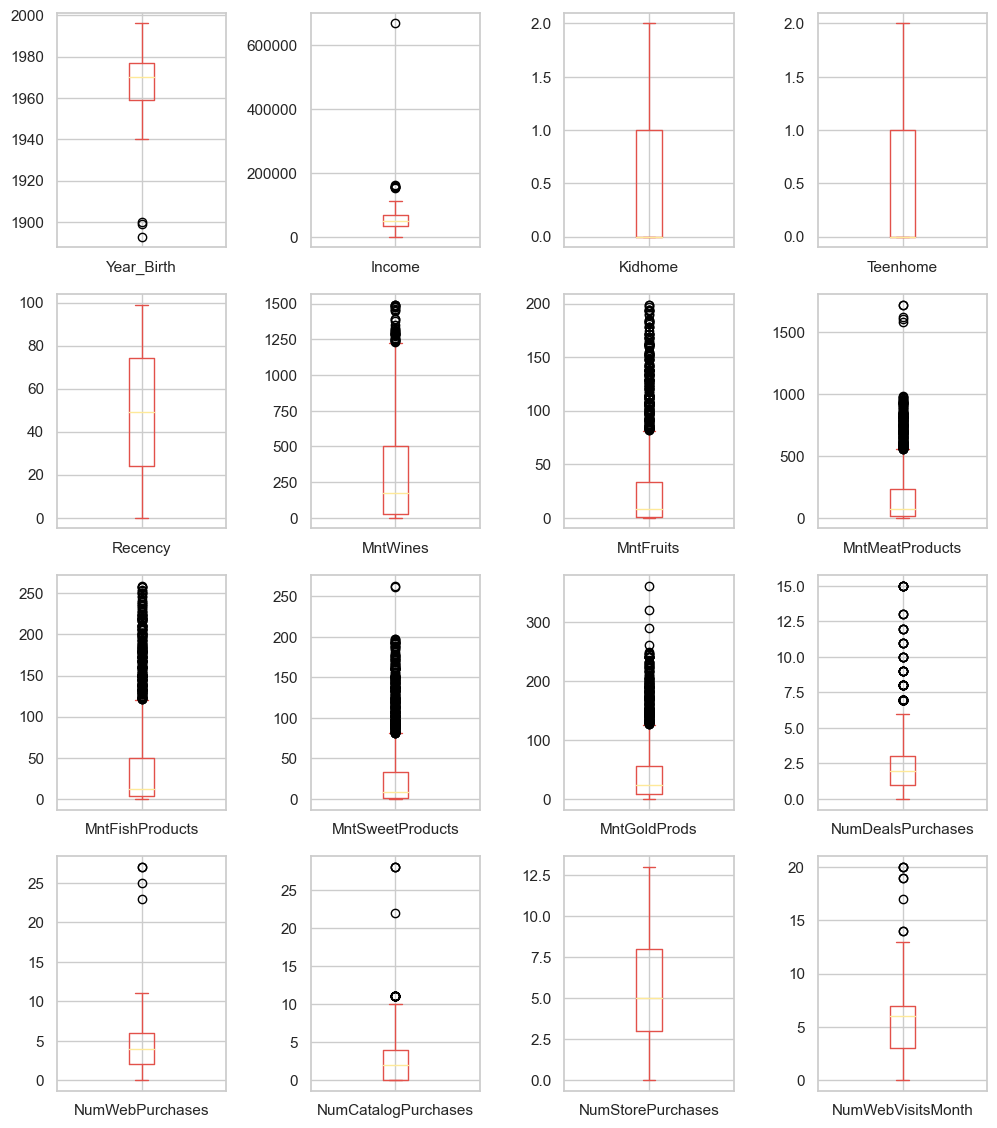

In [26]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

In [27]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

In [28]:
# Show data after removal of Year_Birth < 1900
df.select_dtypes(include=['float','int']).sort_values(by='Year_Birth', ascending=True).drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'])

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
2169,1940,51141.0,0,0,96,144,0,7,0,0,6,1,3,1,4,5
1738,1941,93027.0,0,0,77,1285,42,716,55,0,21,0,7,10,5,2
1473,1943,65073.0,0,0,65,629,17,177,69,0,8,1,5,3,5,2
1642,1943,75865.0,0,0,73,483,0,591,156,0,12,1,3,5,10,1
1348,1943,57513.0,0,0,59,735,40,183,52,20,30,2,9,3,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,1995,80617.0,0,0,42,594,51,631,72,55,32,1,4,6,8,2
696,1995,71163.0,0,0,30,283,17,372,138,106,44,1,3,8,12,1
1296,1995,83257.0,0,0,56,536,27,590,38,107,67,1,5,10,12,6
1822,1996,14421.0,0,0,81,0,0,2,3,3,8,1,1,0,2,5


## Question 3
Apakah terdapat distribusi yang tidak masuk akal?

In [29]:
# Bertugas untuk memplot data numerik 
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

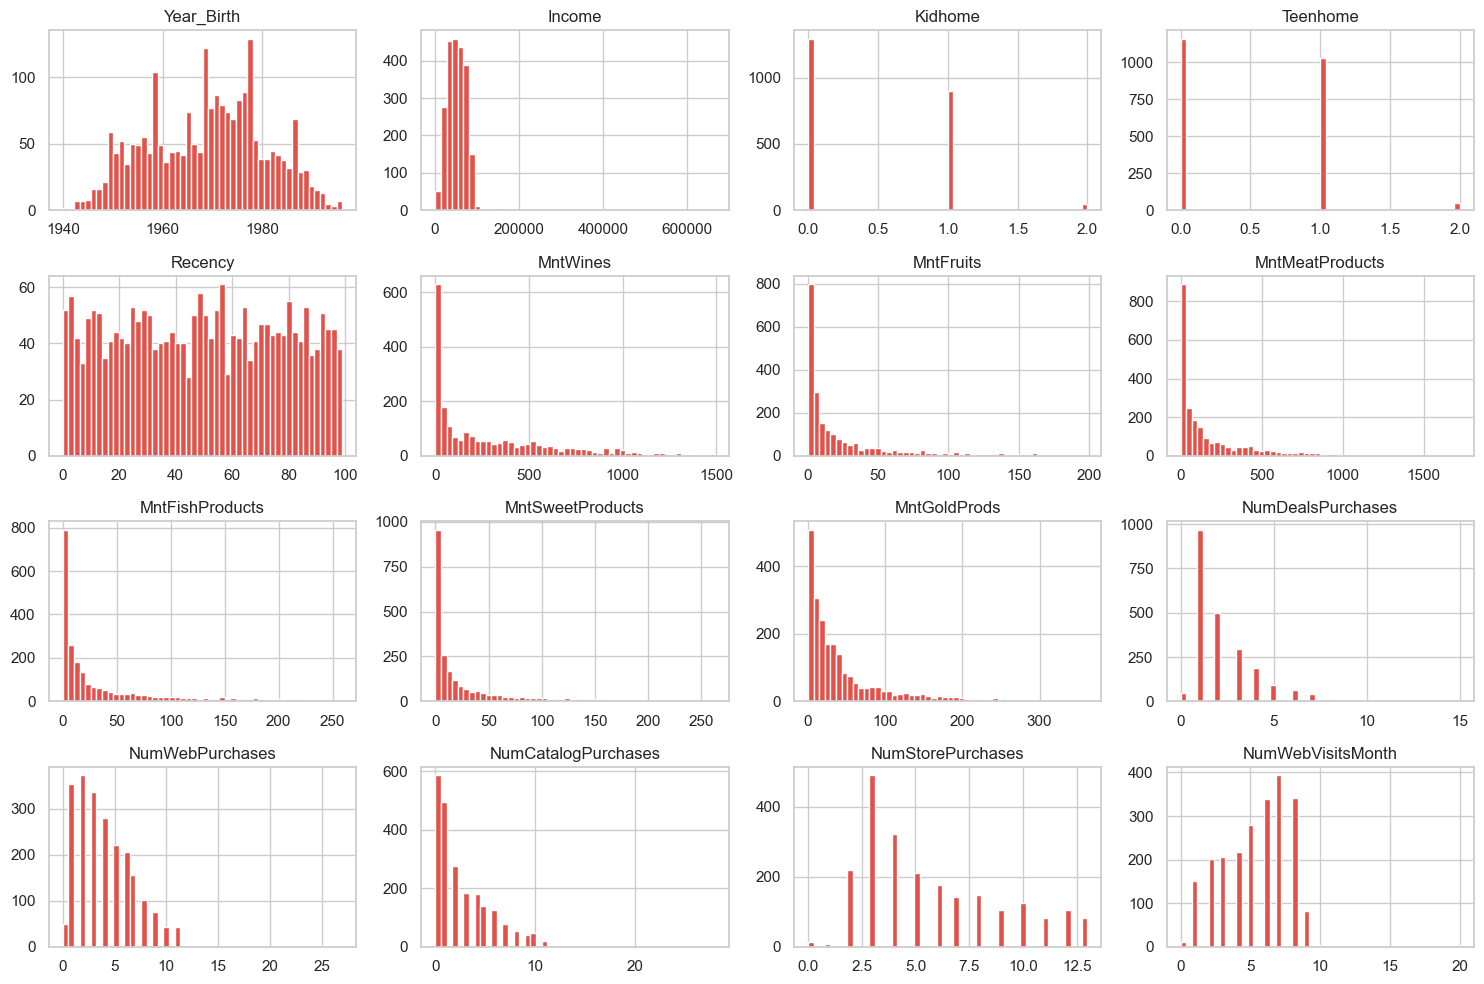

In [30]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

In [31]:
# Kesimpulan: Tidak terdapat distribusi yang tidak masuk akal seperti sebaran data negatif, DoB yang terlalu tua, Income yang terlalu tinggi, atau data yang tidak relevan.

# Data Insight

In [32]:
#df.head()
# Sort by Year_Birth
df.sort_values(by='Year_Birth', ascending=True).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2169,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0,SP
1738,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0,SP
1473,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,17,177,69,0,8,1,5,3,5,2,0,0,0,0,0,0,1,SP
1642,7106,1943,PhD,Married,75865.0,0,0,2014-03-31,73,483,0,591,156,0,12,1,3,5,10,1,0,0,0,0,0,0,0,SP
1348,1453,1943,PhD,Widow,57513.0,0,0,2013-07-06,59,735,40,183,52,20,30,2,9,3,13,6,0,0,0,0,0,0,0,SP


In [33]:
# Sum each Year_Birth to check Total_Customers are born in each year and sort descending by total customers
df.groupby('Year_Birth').size().reset_index(name='Total_Customers').sort_values(by='Total_Customers', ascending=False)


,Year_Birth,Total_Customers
35,1976,89
30,1971,87
34,1975,83
31,1972,79
37,1978,77
29,1970,77
32,1973,74
24,1965,74
28,1969,71
33,1974,69


## Year_Birth

In [34]:
df['Customer_Age']  = df['Dt_Customer'].dt.year - df['Year_Birth']

In [35]:
# Show table Year_Birth, Customer_Age, and Total_Customer at that Age, sort by descending Year of Birth
df[['Year_Birth', 'Customer_Age']].groupby(['Year_Birth', 'Customer_Age']).size().reset_index(name='Total_Customer').sort_values(by='Year_Birth', ascending=True).head()

,Year_Birth,Customer_Age,Total_Customer
0,1940,73,1
1,1941,72,1
2,1943,70,6
3,1943,71,1
4,1944,69,4


In [36]:
# Show table Year_Birth, Customer_Age, and Total_Customer at that Age, sort by descending Total_Customer
df[['Year_Birth', 'Customer_Age']].groupby(['Year_Birth', 'Customer_Age']).size().reset_index(name='Total_Customer').sort_values(by='Total_Customer', ascending=False).head()

,Year_Birth,Customer_Age,Total_Customer
85,1971,42,53
97,1975,38,48
100,1976,37,46
106,1978,35,43
88,1972,41,43


In [37]:
# Show table Year_Birth, Customer_Age, and Total_Customer at that Age, sort by descending Customer_Age
df[['Year_Birth', 'Customer_Age']].groupby(['Year_Birth', 'Customer_Age']).size().reset_index(name='Total_Customer').sort_values(by='Customer_Age', ascending=False).head()

,Year_Birth,Customer_Age,Total_Customer
0,1940,73,1
1,1941,72,1
3,1943,71,1
2,1943,70,6
5,1944,70,3


<Axes: xlabel='Customer_Age', ylabel='Count'>

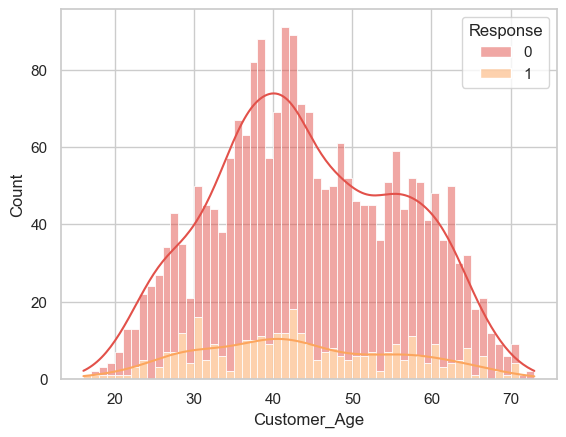

In [38]:
# sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True)
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', binwidth=1, kde=True)


In [39]:
# Show in table descending 0+1
age_response_table = df.groupby(['Customer_Age', 'Response']).size().unstack(fill_value=0)
age_response_table['Total'] = age_response_table.sum(axis=1)
age_response_table = age_response_table
age_response_table

# Categorize in range for example 20-30, 30-40, etc.
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
age_response_table['Age_Group'] = pd.cut(age_response_table.index, bins=bins, labels=labels, right=False)
age_response_table.sort_values(by='Age_Group', ascending=False)


Response,0,1,Total,Age_Group
Customer_Age,,,,
73,1,0,1,71-80
72,1,0,1,71-80
71,1,0,1,71-80
70,5,4,9,71-80
65,17,1,18,61-70
61,33,3,36,61-70
62,46,4,50,61-70
63,25,5,30,61-70
64,24,8,32,61-70


<Axes: xlabel='Age_Group', ylabel='Count'>

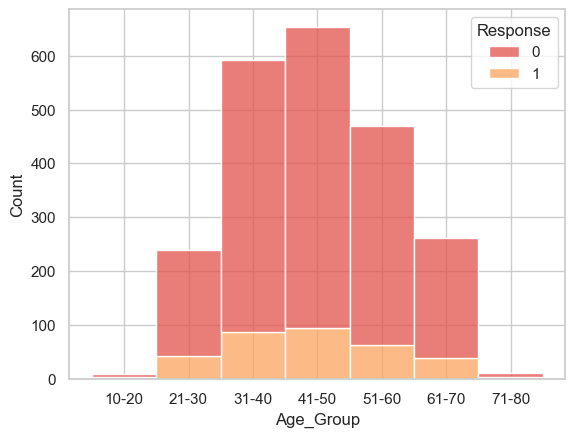

In [40]:
# Show the diagram that shows the distribution of Customer_Age in range 10-90 with Response 0 and 1
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_labels, right=False)

sns.histplot(data=df, x='Age_Group', hue='Response', multiple='stack')


In [41]:
grouped_age = df.groupby(['Age_Group', 'Response']).size().unstack(fill_value=0)
grouped_age['Total'] = grouped_age.sum(axis=1)
grouped_age.sort_values(by='Total', ascending=False)


Response,0,1,Total
Age_Group,,,
41-50,559,94,653
31-40,504,87,591
51-60,407,63,470
61-70,223,39,262
21-30,196,43,239
71-80,8,4,12
10-20,6,4,10
81-90,0,0,0


In [42]:
# Kesimpulan: Dapat dilihat rentang pelanggan terbanyak berada pada usia 41-50 tahun baik pada Response 0 maupun 1.

## Education

In [43]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

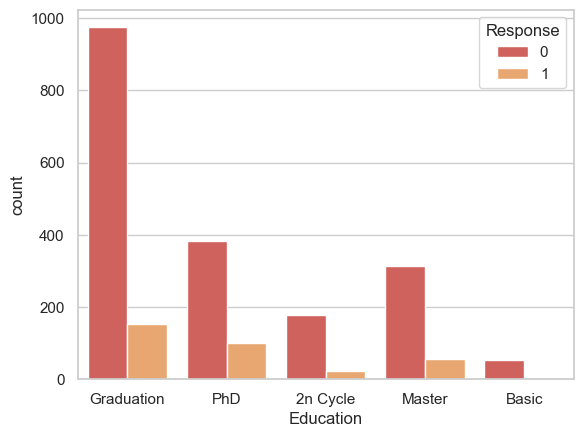

In [44]:
sns.countplot(data=df, x='Education', hue='Response')

In [45]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

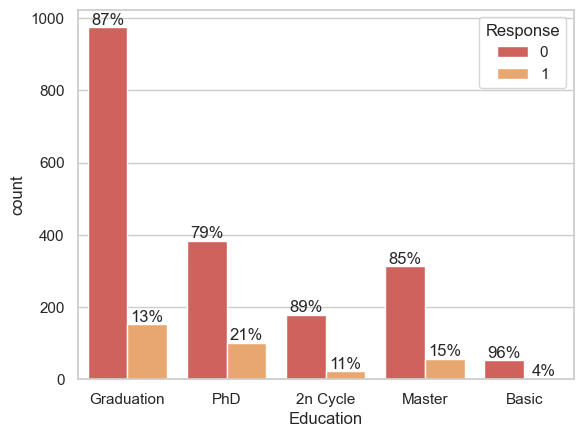

In [46]:
ax = sns.countplot(x='Education', hue='Response', data=df)
barPerc(df, 'Education', ax)

# Phd memiliki ketertarikan paling tinggi untuk menerima penawaran campaign

In [47]:
# Hitung jumlah masing-masing kombinasi Education dan Response
edu_response_counts = df.groupby(['Education', 'Response']).size().unstack(fill_value=0)

# Hitung persentase untuk masing-masing Response di setiap Education
edu_response_percent = edu_response_counts.div(edu_response_counts.sum(axis=1), axis=0) * 100

# Hitung selisih antara % Response 1 dan 0
edu_response_percent['Difference'] = edu_response_percent[1] - edu_response_percent[0]

# Tampilkan hasil dalam bentuk DataFrame
display(edu_response_percent[['Difference']])

# Menunjukan bahwa mayoritas response masih menolak penawaran campaign dengan penolakan terbesar berasal dari Basic Education

Response,Difference
Education,
2n Cycle,-78.109453
Basic,-92.592593
Graduation,-73.025732
Master,-69.189189
PhD,-58.350515


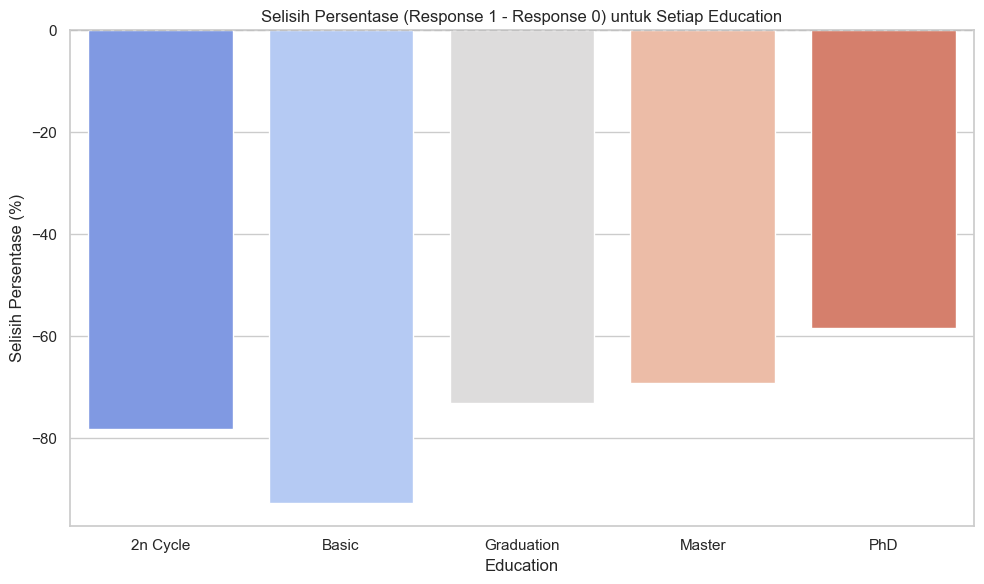

In [48]:
# Plot selisih persentase
plt.figure(figsize=(10,6))
sns.barplot(x=edu_response_percent.index, y=edu_response_percent['Difference'], palette='coolwarm')
plt.title('Selisih Persentase (Response 1 - Response 0) untuk Setiap Education')
plt.ylabel('Selisih Persentase (%)')
plt.xlabel('Education')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

(0.0, 175000.0)

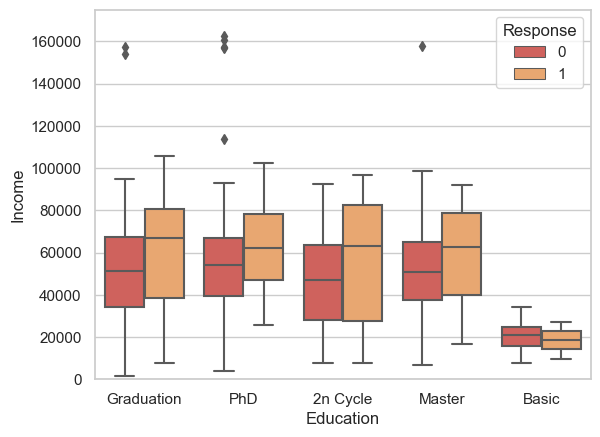

In [49]:
sns.boxplot(data =df , x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

# Income yang lebih tinggi cenderung menerima/membeli penawaran campaign

## Marital Status

In [50]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Age_Group
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,41-50
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,51-60
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,51-60
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,41-50
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,21-30


In [51]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [52]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))

In [53]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

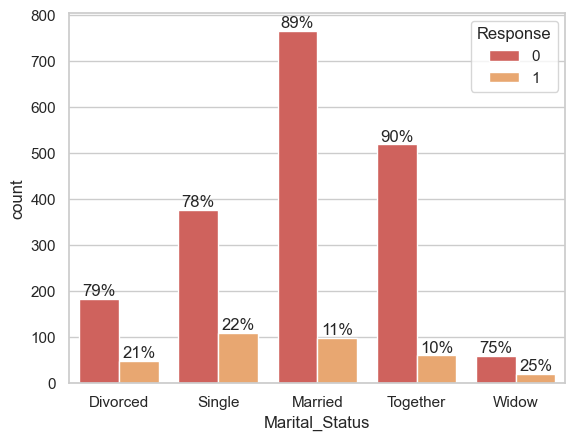

In [54]:
ax = sns.countplot(x='Marital_Status', hue='Response', data=df)
barPerc(df, 'Marital_Status', ax)

# Ada kecenderungan jika customer tinggal sendiri/membiayai sendiri hidup cenderung membeli/menerima penawaran campaign

## Kidhome + Teenhome

In [55]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Age_Group
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,41-50
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,51-60
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,51-60
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,41-50
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,21-30


In [56]:
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']

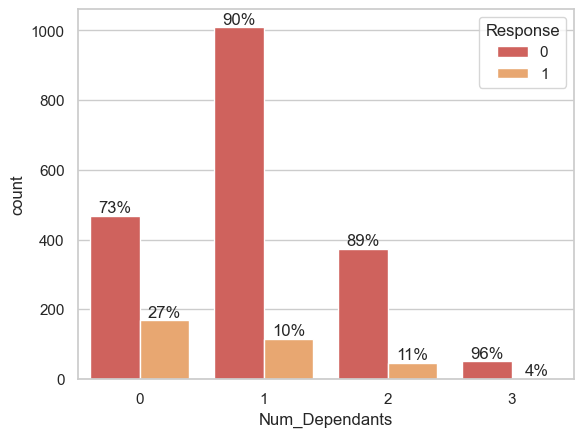

In [57]:
ax = sns.countplot(x='Num_Dependants', hue='Response', data=df)
barPerc(df, 'Num_Dependants', ax)

# Customer yang tinggal sendiri cenderung menerima penawaran campaign

## Customer Join Date

In [58]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

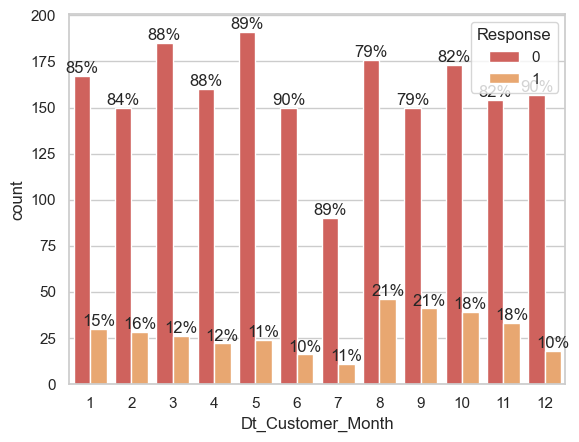

In [59]:
ax = sns.countplot(x='Dt_Customer_Month', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Month', ax)

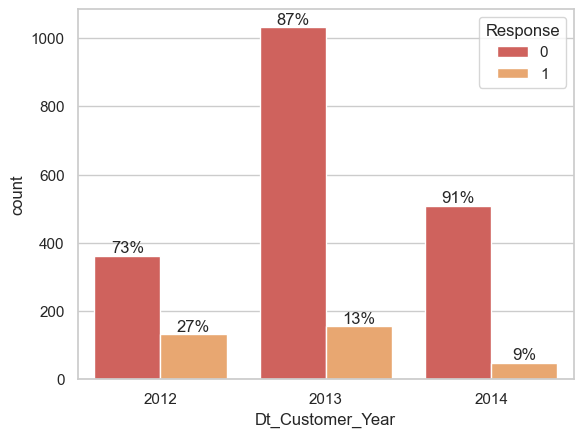

In [60]:
ax = sns.countplot(x='Dt_Customer_Year', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Year', ax)

# Semakin lama customer sudah join, maka semakin besar kemungkinan customer akan menerima penawaran campaign

In [61]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Age_Group,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,41-50,0,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,51-60,0,6,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,51-60,1,5,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,41-50,2,5,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,21-30,1,4,2014


## Recency

<Axes: xlabel='Recency', ylabel='Count'>

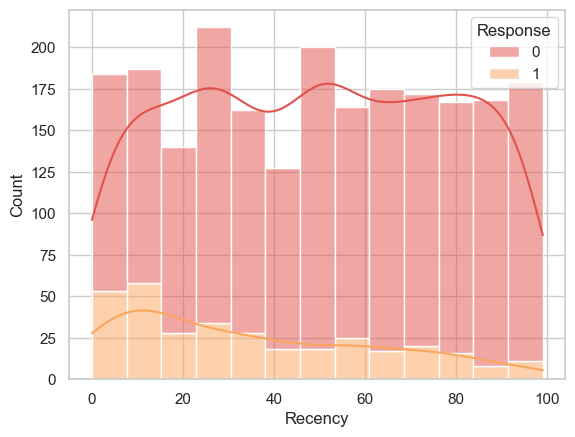

In [62]:
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde=True)

# Customer yang belum lama membeli, maka cenderung menerima penawaran campaign terbaru

## Amount Spent

In [63]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
amt_spent_features.append('Response')

In [64]:
df[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


In [65]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
df['TotalAmount_Spent'] = df[amt_spent_features].sum(axis=1)

<Axes: xlabel='TotalAmount_Spent', ylabel='Count'>

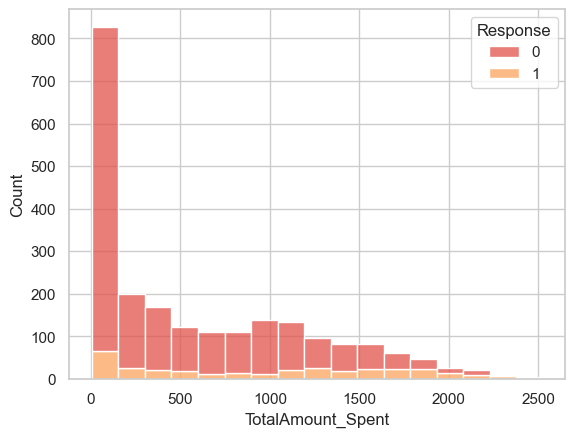

In [66]:
sns.histplot(data=df, kde=False, x='TotalAmount_Spent', hue='Response', multiple='stack')

# Jika customer sudah nge-spent moneynya di sekitaran 1000-2000 dollar maka customer ini cenderung menerima penawaran campaign

In [67]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Age_Group,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,41-50,0,6,2014,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,51-60,0,6,2014,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,51-60,1,5,2014,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,41-50,2,5,2014,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,21-30,1,4,2014,91


## Purchases

In [68]:
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
purchase_feature.append('Response')

In [69]:
df[purchase_feature].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [70]:
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
df['Total_Purchases'] = df[purchase_feature].sum(axis=1)

<Axes: xlabel='Total_Purchases', ylabel='Count'>

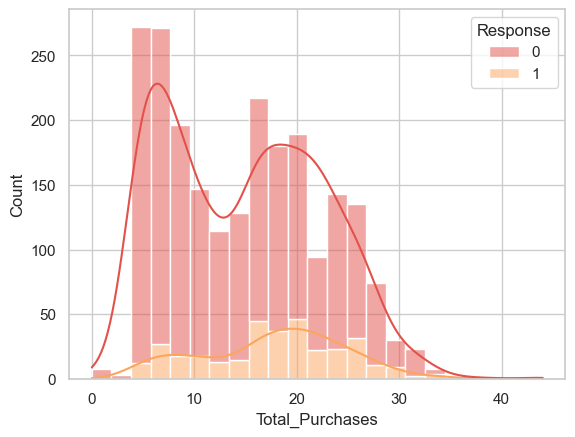

In [71]:
sns.histplot(data=df, kde=True, x='Total_Purchases', hue='Response', multiple='stack')

# Tidak ada pola unik, atau pemisah antara response 0 dan 1

## NumWebVisitsMonth

In [72]:
df[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

# Tidak memiliki korelasi terhadap Response

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


In [73]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Age_Group,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,41-50,0,6,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,51-60,0,6,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,51-60,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,41-50,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,21-30,1,4,2014,91,8


## Previous Campaign

In [74]:
prev_cmp = [c for c in df.columns if 'AcceptedCmp' in str(c)]
prev_cmp.append('Response')

In [75]:
df[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


## Complain

In [76]:
df[['Complain', 'Response']].corr()[['Response']]

# Tidak memiliki korelasi terhadap Response

,Response
Complain,0.000185
Response,1.000000


## Country

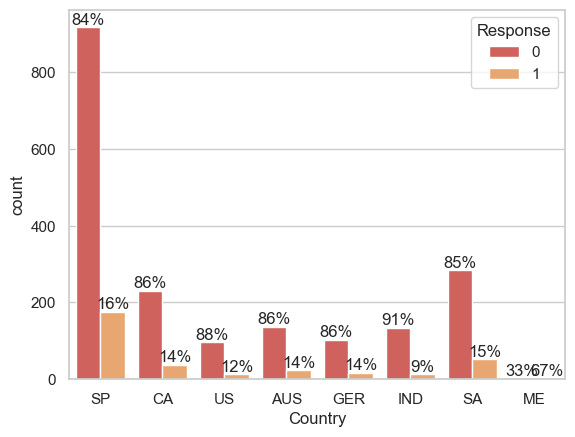

In [77]:
ax = sns.countplot(x='Country', hue='Response', data=df)
barPerc(df, 'Country', ax)

## Mexico dan Spain adalah negara yang paling cenderung menerima penawaran campaign terbaru

# Modelling

## Data Splitting 
- Data Train = 60%
- Data Validation = 20%
- Data Test = 20%

In [78]:
df = pd.read_csv('marketing_data.csv')
df.shape

(2240, 28)

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [81]:
df_train.shape, df_valid.shape, df_test.shape

((1344, 28), (448, 28), (448, 28))

In [82]:
1344/2240, 448/2240, 448/2240

(0.6, 0.2, 0.2)

In [83]:
# Data Processing dulu --> Baru Data Splitting? --> akan terjadi data leakage
# Data Splitting dulu --> Baru Data Processing?

In [84]:
# df_train
# df_valid
# df_test

# Preprocessing

## Numeric Preprocessing

In [85]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_valid.columns = df_valid.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

In [86]:
df_train['Income'] = df_train['Income'].str.replace('$', '')
df_train['Income'] = df_train['Income'].str.replace(',', '')
df_train['Income'] = df_train['Income'].astype('float')

df_valid['Income'] = df_valid['Income'].str.replace('$', '')
df_valid['Income'] = df_valid['Income'].str.replace(',', '')
df_valid['Income'] = df_valid['Income'].astype('float')

df_test['Income'] = df_test['Income'].str.replace('$', '')
df_test['Income'] = df_test['Income'].str.replace(',', '')
df_test['Income'] = df_test['Income'].astype('float')

In [87]:
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])

df_valid['Dt_Customer'] = pd.to_datetime(df_valid['Dt_Customer'])

df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

In [88]:
df_train['Income'] = df_train['Income'].fillna(df_train['Income'].median())
df_valid['Income'] = df_valid['Income'].fillna(df_valid['Income'].median())
df_test['Income'] = df_test['Income'].fillna(df_test['Income'].median())

In [89]:
df_train = df_train[df_train['Year_Birth'] > 1900].reset_index(drop=True)
df_valid = df_valid[df_valid['Year_Birth'] > 1900].reset_index(drop=True)
df_test = df_test[df_test['Year_Birth'] > 1900].reset_index(drop=True)

In [90]:
df_train['Customer_Age']  = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']
df_valid['Customer_Age']  = df_valid['Dt_Customer'].dt.year - df_valid['Year_Birth']
df_test['Customer_Age']  = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

In [91]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))

In [92]:
df_train['Num_Dependants'] = df_train['Kidhome'] + df_train['Teenhome']
df_valid['Num_Dependants'] = df_valid['Kidhome'] + df_valid['Teenhome']
df_test['Num_Dependants'] = df_test['Kidhome'] + df_test['Teenhome']

In [93]:
df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year

df_valid['Dt_Customer_Month'] = df_valid['Dt_Customer'].dt.month
df_valid['Dt_Customer_Year'] = df_valid['Dt_Customer'].dt.year

df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year

In [94]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
df_train['TotalAmount_Spent'] = df_train[amt_spent_features].sum(axis=1)
df_valid['TotalAmount_Spent'] = df_valid[amt_spent_features].sum(axis=1)
df_test['TotalAmount_Spent'] = df_test[amt_spent_features].sum(axis=1)

In [95]:
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
df_train['Total_Purchases'] = df_train[purchase_feature].sum(axis=1)
df_valid['Total_Purchases'] = df_valid[purchase_feature].sum(axis=1)
df_test['Total_Purchases'] = df_test[purchase_feature].sum(axis=1)

In [96]:
display(df_train.head())
print()
display(df_valid.head())
print()
display(df_test.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,7143,1955,2n Cycle,Together,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,58,1,11,2013,820,26
1,6383,1971,PhD,Together,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,43,1,5,2014,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,34,1,3,2014,275,12
3,5393,1977,Graduation,Single,23763.0,1,0,2012-08-07,64,22,0,6,6,2,6,1,1,0,3,7,0,0,0,0,0,0,0,SP,35,1,8,2012,42,5
4,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,0,SP,28,0,4,2014,1795,27


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,1,9,2012,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,1,11,2012,928,14
2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1,12,2012,155,10
3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,52,1,5,2014,578,20
4,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,37,2,6,2014,493,23


In [97]:
cmp_feat = [c for c in df.columns if 'AcceptedCmp' in str(c)]
mnt_feat = [c for c in df.columns if 'Mnt' in str(c)]
num_feat = [c for c in df.columns if 'Num' in str(c)]

In [98]:
numeric_feat = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_Age',
                'Num_Dependants', 'Dt_Customer_Month', 'Dt_Customer_Year', 
                'TotalAmount_Spent', 'Total_Purchases']

In [99]:
all_numeric_feat = cmp_feat + mnt_feat + num_feat + numeric_feat

In [100]:
display(df_train[all_numeric_feat].head(2))
display(df_valid[all_numeric_feat].head(2))
display(df_test[all_numeric_feat].head(2))

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,209,162,209,41,162,37,5,4,7,10,2,74805.0,0,1,14,0,58,1,11,2013,820,26
1,0,0,0,0,0,26,0,15,2,1,2,2,3,0,3,8,32892.0,1,0,78,0,43,1,5,2014,46,8


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42,1,9,2012,1029,17
1,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,46,1,11,2012,928,14


## Categoric Preprocessing

In [101]:
df_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


In [102]:
categoric_feat = ['Education', 'Marital_Status', 'Country']

In [103]:
all_feat = categoric_feat + all_numeric_feat

In [104]:
df_train_final = df_train[all_feat]
df_valid_final = df_valid[all_feat]
df_test_final = df_test[all_feat]

Categoric:
- Education (ordinal)
- Marital_Status (nominal)
- Country (nominal)

In [105]:
df_train.Education.unique()

array(['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], dtype=object)

In [106]:
education = {'Basic':1 , 'Graduation':2, '2n Cycle':3, 'Master':4 , 'PhD':5}

In [107]:
df_train_final['Education'] = df_train_final['Education'].map(education)
df_valid_final['Education'] = df_valid_final['Education'].map(education)
df_test_final['Education'] = df_test_final['Education'].map(education)

In [108]:
df_train_final.head()

,Education,Marital_Status,Country,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,5,Single,CA,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,2,Married,SP,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23
2,4,Married,SP,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,12,2013,70,6
3,2,Married,SA,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6,76445.0,1,0,2,0,41,1,9,2012,1410,21
4,2,Single,SP,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9,22585.0,0,0,23,0,43,0,3,2013,81,5


In [109]:
from sklearn.feature_extraction import DictVectorizer

In [110]:
dv = DictVectorizer(sparse=False)

In [111]:
df_train_final_dicts = df_train_final.to_dict(orient='records')
df_valid_final_dicts = df_valid_final.to_dict(orient='records')
df_test_final_dicts = df_test_final.to_dict(orient='records')

In [112]:
df_train_final_dicts = dv.fit_transform(df_train_final_dicts)

In [113]:
df_valid_final_dicts = dv.transform(df_valid_final_dicts)
df_test_final_dicts = dv.transform(df_test_final_dicts)

In [114]:
df_train_final = pd.DataFrame(df_train_final_dicts, columns = dv.get_feature_names_out())

In [115]:
df_valid_final = pd.DataFrame(df_valid_final_dicts, columns = dv.get_feature_names_out())
df_test_final = pd.DataFrame(df_test_final_dicts, columns = dv.get_feature_names_out())

# Modelling

- X = independent variable
- y = dependent variable (target variable) --> response 

In [116]:
X_train_final = df_train_final
X_valid_final = df_valid_final
X_test_final = df_test_final

In [117]:
y_train_final = df_train.Response
y_valid_final = df_valid.Response
y_test_final = df_test.Response

## Base Model

### Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
from sklearn.metrics import roc_auc_score

In [120]:
model = LogisticRegression(random_state=42)
model.fit(X_train_final, y_train_final)

LogisticRegression(random_state=42)

In [121]:
y_valid_pred = model.predict_proba(X_valid_final)[:,1]

In [122]:
print('LogisticRegression ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

LogisticRegression ROCAUC Result: 0.746


### RandomForest

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [125]:
y_valid_pred = model.predict_proba(X_valid_final)[:,1]
print('RandomForest ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

RandomForest ROCAUC Result: 0.885


## Performance Stability Check

In [126]:
X_full_train_final = pd.concat([X_train_final, X_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

In [127]:
model = RandomForestClassifier(random_state=42)
model.fit(X_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

In [128]:
y_test_pred = model.predict_proba(X_test_final)[:,1]

print('RandomForest ROCAUC Result:' , roc_auc_score(y_test_final, y_test_pred).round(3))

RandomForest ROCAUC Result: 0.869


# Interpretation

In [161]:
import shap

In [ ]:
# Pastikan DataFrame
if not isinstance(X_test_final, pd.DataFrame):
    X_test_final = pd.DataFrame(
        X_test_final,
        columns=[f"Feature_{i}" for i in range(X_test_final.shape[1])]
    )

In [ ]:
# menghitung shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_final)

In [185]:
# Jika multi-class -> pilih kelas yang diinginkan
if isinstance(shap_values, list):
    sv = shap_values[1]  # contoh: kelas indeks 1
else:
    sv = shap_values

# Sesuaikan shape jika kelebihan kolom (intercept)
if sv.shape[1] != X_test_final.shape[1]:
    min_features = min(sv.shape[1], X_test_final.shape[1])
    sv = sv[:, :min_features]
    X_test_final = X_test_final.iloc[:, :min_features]

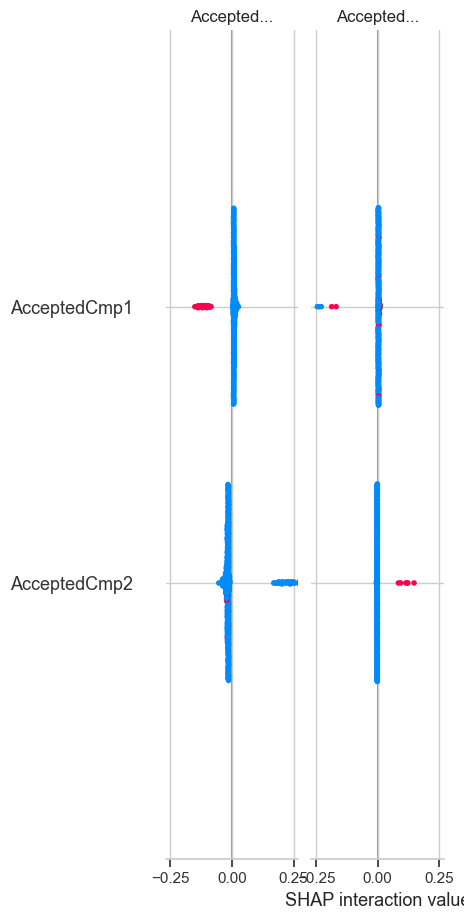

In [186]:
# plot
# plt.title('SHAP Summary for Top 10 Features', size=16)
shap.summary_plot(sv, X_test_final, max_display=10, plot_size=[12,8])